In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
import numpy as np
from sklearn.linear_model import RidgeCV,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
data=df=pd.read_csv("C:\\Users\\Yacou\\Desktop\\Yacouba_New\\climte\\Data\\Rendements\\okay\\mil_mais.csv")

In [3]:
data

,provinces,year,Tmin_ERA5,ERA5_Pressure,ERA5_Tmax,ERA5_soil_moisture,ERA5_wins,ARC2_year,Best_Temp_Max,Best_Temp,...,NAO,NTA,PDO,gmsst,qbo,sahel_rainfal,tna,tsa,mais,mil
0,Bale,2000,295.346261,101164.2983,303.090003,0.387494,2.297034,773.367238,33.156278,20.839313,...,0.540000,-0.206667,-0.046667,0.626667,-1.613333,-1.333333,-0.076667,0.286667,1459.049128,960.581652
1,Banwa,2000,295.255481,101163.6513,303.142447,0.325074,2.308840,844.566249,32.867129,20.635878,...,0.540000,-0.206667,-0.046667,0.626667,-1.613333,-1.333333,-0.076667,0.286667,1308.239124,1029.044240
2,Bale,2001,295.528019,101230.8929,302.867590,0.384737,2.354358,761.434378,33.010053,21.012269,...,-0.003333,-0.010000,-0.360000,0.663333,-20.676667,41.000000,0.116667,0.403333,1750.949650,979.593220
3,Kossi,2000,295.949711,101115.5259,304.451160,0.296759,2.279619,705.402388,33.470032,21.368522,...,0.540000,-0.206667,-0.046667,0.626667,-1.613333,-1.333333,-0.076667,0.286667,535.000000,550.000000
4,Bale,2002,296.134700,101202.3614,304.007824,0.361794,2.423180,721.190411,33.496455,21.864440,...,0.560000,-0.120000,-0.433333,0.773333,13.816667,-74.666667,-0.113333,0.376667,1578.408370,850.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,Zondoma,2016,296.632578,101190.4650,305.163821,0.200586,2.307139,882.803056,33.657614,22.672844,...,-0.180000,0.296667,2.333333,1.206667,2.290000,64.666667,0.363333,0.473333,793.429896,638.142700
806,Yatenga,2017,296.898290,101159.1897,305.863082,0.173094,2.463822,816.631204,34.291164,23.323867,...,0.123333,0.463333,0.930000,1.093333,6.236667,184.666667,0.550000,0.480000,813.503311,658.394064
807,Ziro,2017,295.759636,101246.8867,303.227227,0.316436,2.340768,879.972562,32.906914,21.650720,...,0.123333,0.463333,0.930000,1.093333,6.236667,184.666667,0.550000,0.480000,1237.511702,706.659920
808,Zoundweogo,2017,296.122954,101234.0524,303.601853,0.339022,2.379471,922.991941,32.932326,21.730105,...,0.123333,0.463333,0.930000,1.093333,6.236667,184.666667,0.550000,0.480000,1768.268712,1019.297740


In [4]:
vect=['Bale','Banwa','Kossi','Mouhoun',	'Nayala',	'Sourou',	'Comoe'	,
      'Leraba',	'Boulgou',	'Koulpelogo',	'Kouritenga',	'Bam'	,'Namentenga',
      'Sanmatenga',	'Boulkiemde',	'Sanguie'	,'Sissili',	'Ziro',	'Bazega',	'Nahouri',
      'Zoundweogo',	'Kadiogo','Gnagna',	'Gourma',	'Komandjoari',	'Kompienga'	,'Tapoa',
      'Houet'	,'Kenedougou',	'Tuy','Loroum',	'Passore',	'Yatenga',	'Zondoma',	'Ganzourgou',
      'Kourweogo',	'Oubritenga',
      'Oudalan','Seno',	'Soum',	'Yagha','Bougouriba',	'Ioba',	'Noumbiel',	'Poni']
len(vect)

45

In [8]:
#y=df['year']
y=df.loc[df['provinces'].isin(['Bougouriba'])]['year']

In [9]:
col=data.columns
col

Index(['provinces', 'year', 'Tmin_ERA5', 'ERA5_Pressure', 'ERA5_Tmax',
       'ERA5_soil_moisture', 'ERA5_wins', 'ARC2_year', 'Best_Temp_Max',
       'Best_Temp', 'NDVI', 'Tamsat_Prec', 'chirps_Prec', 'CDD', 'CWD',
       'PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx', 'Nino', 'AMM',
       'AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst', 'qbo', 'sahel_rainfal',
       'tna', 'tsa', 'mais', 'mil'],
      dtype='object')

In [26]:
c0=['provinces']
c1=['year', 'Tmin_ERA5', 'ERA5_Pressure',
        'ERA5_wins', 'ARC2_year', 'Best_Temp_Max',
       'Best_Temp',  'Tamsat_Prec', 'chirps_Prec', 'CDD', 'CWD',
       'PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx', 'Nino','sahel_rainfal','qbo','mil','mais' ]
c2=['NDVI','ERA5_soil_moisture','AMM',
       'AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst',
       'tna', 'tsa']
d2=data[c2]

#d3=data[ 'mil']
#d4=data['mais']

In [27]:
d1=data[c1]
X = pd.DataFrame(StandardScaler().fit_transform(d1))
d1=X.rename(columns={0:'year', 1:'Tmin_ERA5', 2:'ERA5_Pressure',
        3:'ERA5_wins', 4:'ARC2_year', 5:'Best_Temp_Max',
       6:'Best_Temp', 7:'Tamsat_Prec', 8:'chirps_Prec', 9:'CDD', 10:'CWD',
       11:'PRCPTOT', 12:'R10mm', 13:'R1mm', 14:'R20mm', 15:'R5mm', 16:'R95pTOT', 17:'R99pTOT',
       18:'RX1day', 19:'RX5day', 20:'SDII', 21:'TNn', 22:'TXn', 23:'TNx', 24:'TXx', 25:'Nino',26:'sahel_rainfal',27:'qbo',28:'mil',29:'mais'})

In [29]:
dt=pd.concat([data[c0],d1,d2],axis=1)
dt

,provinces,year,Tmin_ERA5,ERA5_Pressure,ERA5_wins,ARC2_year,Best_Temp_Max,Best_Temp,Tamsat_Prec,chirps_Prec,...,AMM,AMO,AO,EA,NAO,NTA,PDO,gmsst,tna,tsa
0,Bale,-1.638356,-1.087528,-0.370056,-0.454051,-0.190868,-0.354215,-1.166262,-0.469743,-0.092878,...,-1.900000,0.031000,0.425333,-0.110000,0.540000,-0.206667,-0.046667,0.626667,-0.076667,0.286667
1,Banwa,-1.638356,-1.207182,-0.380800,-0.414125,0.305342,-0.683454,-1.383374,-0.251991,-0.343494,...,-1.900000,0.031000,0.425333,-0.110000,0.540000,-0.206667,-0.046667,0.626667,-0.076667,0.286667
2,Bale,-1.445608,-0.847959,0.735889,-0.260182,-0.274032,-0.520714,-0.981679,0.584017,0.343589,...,-1.390000,0.047000,0.447667,0.456667,-0.003333,-0.010000,-0.360000,0.663333,0.116667,0.403333
3,Kossi,-1.638356,-0.292140,-1.180025,-0.512948,-0.664539,0.003042,-0.601474,-0.644021,-0.941824,...,-1.900000,0.031000,0.425333,-0.110000,0.540000,-0.206667,-0.046667,0.626667,-0.076667,0.286667
4,Bale,-1.252861,-0.048313,0.262063,-0.027426,-0.554506,0.033129,-0.072216,0.563520,-0.261517,...,-3.733333,-0.058000,0.574000,0.106667,0.560000,-0.120000,-0.433333,0.773333,-0.113333,0.376667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,Zondoma,1.445608,0.607924,0.064498,-0.419878,0.571828,0.216633,0.790537,0.029485,0.012239,...,-0.530000,0.296000,-0.258333,-1.446667,-0.180000,0.296667,2.333333,1.206667,0.363333,0.473333
806,Yatenga,1.638356,0.958150,-0.454895,0.110027,0.110653,0.938027,1.485328,-1.084946,-0.577379,...,1.150000,0.287667,-0.139000,0.843333,0.123333,0.463333,0.930000,1.093333,0.550000,0.480000
807,Ziro,1.638356,-0.542672,1.001500,-0.306143,0.552101,-0.638153,-0.300305,0.147152,0.378733,...,1.150000,0.287667,-0.139000,0.843333,0.123333,0.463333,0.930000,1.093333,0.550000,0.480000
808,Zoundweogo,1.638356,-0.063794,0.788359,-0.175251,0.851918,-0.609218,-0.215582,-0.003973,-0.001632,...,1.150000,0.287667,-0.139000,0.843333,0.123333,0.463333,0.930000,1.093333,0.550000,0.480000


In [48]:
def figures(df,level):
    dt=df.loc[df['provinces'].isin([level])]
    PRCPTOT=dt['Nino']
    mais=dt['mais']
    plt.plot(y, PRCPTOT, color='r', label='Nino')
    plt.plot(y, mais, color='g', label='mais')
    plt.title(level)
    plt.legend()
    plt.savefig(level)

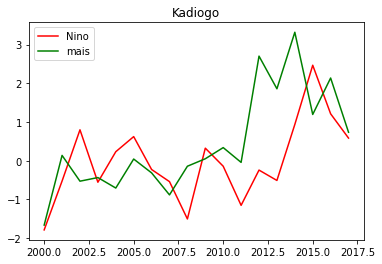

In [49]:
figures(dt,"Kadiogo")
plt.savefig("C:\\Users\\Yacou\\Desktop\\Yacouba_New\\climte\\code\\Crop_yield\\python\\dern\\figure\\kadiogo3_mais.jpg")